## Observations and Insights 

In [1]:
%load_ext lab_black

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

## why can't i string all these replaces together?
# Reformat column headers
df = df.rename(
    columns=lambda header_str: header_str.lower()
    .replace(" ", "_")
    .replace(")", "")
    .replace("(", "")
)

# df["mouseid"] = df["mouse_id"]

# Display the data table for preview
# df.head()
df.shape

(1893, 8)

In [3]:
# Checking the number of mice.

df = df.drop_duplicates()

# get only the columns i need
df_minimized = df[["mouse_id", "timepoint", "drug_regimen"]]

# add in a count
df_count = (
    df_minimized.groupby(by=["mouse_id", "timepoint", "drug_regimen"])["mouse_id"]
    .count()
    .reset_index(name="count")
)
# print(df_count3)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.

# list of mice with duplicate values
df_count[df_count["count"] > 1].sort_values(by="timepoint")

,mouse_id,timepoint,drug_regimen,count
587,g989,5,Propriva,2
588,g989,10,Propriva,2
589,g989,15,Propriva,2
590,g989,20,Propriva,2


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

df = df[df.mouse_id != "g989"]

In [18]:
# Checking the number of mice in the clean DataFrame.

df.head()

# df[df["mouse_id"] == "g989"].sort_values(by="timepoint")

# df.shape

# df[df["count"] > 1].sort_values(by="timepoint")

# df.sort_values(by="count")

,mouse_id,drug_regimen,sex,age_months,weight_g,timepoint,tumor_volume_mm3,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.


# Get only the data I need for this
df_regimen = df[["drug_regimen", "tumor_volume_mm3"]]
# print(df_regimen)

# how many regimens?
regimen_count = len(df_regimen["drug_regimen"].unique())
# print(f"There are {regimen_count} regimens")

# get the mean
regimen_mean = df_regimen.groupby(by=["drug_regimen"]).mean()
# print(regimen_mean)

# get the median
regimen_median = df_regimen.groupby(by=["drug_regimen"]).median()
# print(regimen_median.shape)

# get the variance
regimen_variance = df_regimen.groupby(by=["drug_regimen"]).var()
# print(regimen_variance.shape)

# get the standard deviation
regimen_standdev = df_regimen.groupby(by=["drug_regimen"]).std()
# print(regimen_standdev.shape)
print(regimen_standdev)

# get the SEM
regimen_sem = df_regimen.groupby(by=["drug_regimen"]).sem()
# print(regimen_sem.shape)

##why am i getting this error? 
# put them all together
pd.DataFrame(
    {
        "Mean": regimen_mean,
        "Median": regimen_median,
        "Variance": regimen_variance,
        "Standard Deviation": regimen_standdev,
        "SEM": regimen_sem,
    },
)

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

# Get only the data I need for this
##original
df_regimen = df[["drug_regimen", "tumor_volume_mm3"]]
# print(df_regimen.dtypes)

##attempt 1 to fix
# df_regimen = df[["drug_regimen", pd.to_numeric("tumor_volume_mm3")]]
# print(df_regimen.dtypes)

##attempt 2 to fix
# df_regimen = pd.to_numeric(df_regimen["tumor_volume_mm3"])
# print(df_regimen)

##I need to convert the volumn to numeric I think?
# get the summary data
regimen_summary = df_regimen.groupby(by = ["drug_regimen"]).mean().median().var().std().sem()

# print(regimen_summary)


AttributeError: 'float' object has no attribute 'std'

## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 



<function matplotlib.pyplot.show(close=None, block=None)>

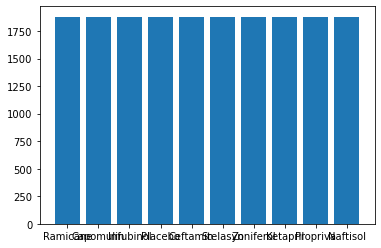

In [55]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# df["drug_regimen"].unique()

# Ramicane = 0
# Capomulin = 0
# Infubinol = 0
# Placebo = 0
# Ceftamin = 0
# Stelasyn = 0
# Zoniferol = 0
# Ketapril = 0
# Propriva = 0
# Naftisol = 0


# def drug_count(i):
#     for i in df:
#         if df["drug_regimen"] == "Ramicane":
#             Ramicane += 1
#         elif df["drug_regimen"] == "Capomulin":
#             Capomulin += 1
#         elif df["drug_regimen"] == "Infubinol":
#             Infubinol += 1
#         elif df["drug_regimen"] == "Placebo":
#             Placebo += 1
#         elif df["drug_regimen"] == "Ceftamin":
#             Ceftamin += 1
#         elif df["drug_regimen"] == "Stelasyn":
#             Stelasyn += 1
#         elif df["drug_regimen"] == "Zoniferol":
#             Zoniferol += 1
#         elif df["drug_regimen"] == "Ketapril":
#             Ketapril += 1
#         elif df["drug_regimen"] == "Propriva":
#             Propriva += 1
#         else:
#             Naftisol += 1
#     print(
#             Ramicane,
#             Capomulin,
#             Infubinol,
#             Placebo,
#             Ceftamin,
#             Stelasyn,
#             Zoniferol,
#             Ketapril,
#             Propriva,
#             Naftisol,
#             )


# drug_count(df)

plt.bar(df["drug_regimen"], df["drug_regimen"].count())
plt.show

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

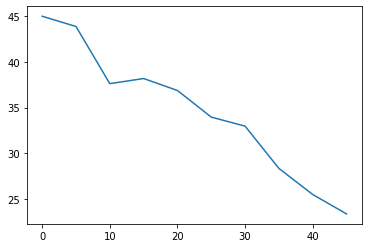

In [65]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Narrow down list to one mouse
df_capo = df[df["drug_regimen"] == "Capomulin"]
# print(df_capo)
df_capo1 = df[df["mouse_id"] == "s185"]
# print(df_capo1)

# Plot data
plt.plot(df_capo1["timepoint"], df_capo1["tumor_volume_mm3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

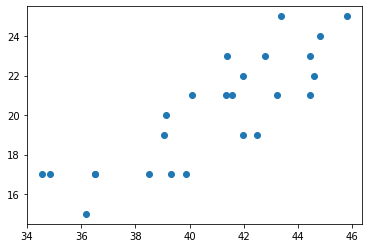

In [83]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
df_capo_vol = df_capo.groupby(by=["mouse_id"]).mean()
# df_capo_vol

plt.scatter(df_capo_vol["tumor_volume_mm3"], df_capo_vol["weight_g"])
plt.show

# df_capo

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
